[Reference](https://medium.com/mlearning-ai/parallelized-ensemble-learning-using-python-23dc1fe04b3d)

In [1]:
pip install -U mlens

     |████████████████████████████████| 227 kB 9.0 MB/s 


In [2]:
import numpy as np
from pandas import DataFrame
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from mlens.ensemble import SuperLearner
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

[MLENS] backend: threading


In [3]:
data = load_iris()
idx = np.random.permutation(150)
X = data.data[idx]
y = data.target[idx]

In [5]:
seed = 100

# Creating Models


In [6]:
ensemble = SuperLearner(scorer=accuracy_score, random_state=seed, verbose=2)
ensemble.add([RandomForestClassifier(random_state=seed), SVC()])
ensemble.add_meta(LogisticRegression())
ensemble.fit(X[:75], y[:75])
preds = ensemble.predict(X[75:])


Fitting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Fit complete                        | 00:00:01

Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00


In [7]:
print("Prediction score: %.3f" % accuracy_score(preds, y[75:]))

Prediction score: 0.947


In [11]:
# print("Score comparison with best params founds:\n\n%r" % evaluator.results)

# Creating Visualizations


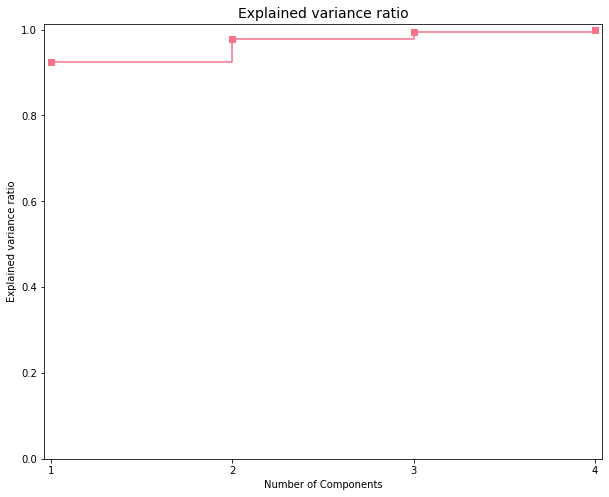

In [9]:
import matplotlib.pyplot as plt
from mlens.visualization import exp_var_plot
from sklearn.decomposition import PCA
exp_var_plot(X, PCA(), marker='s', where='post')

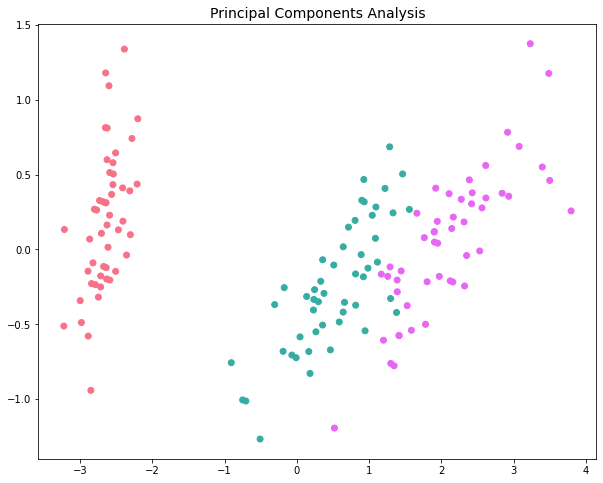

In [10]:
from mlens.visualization import pca_plot
from sklearn.decomposition import PCA
pca_plot(X, PCA(n_components=2), y=y)